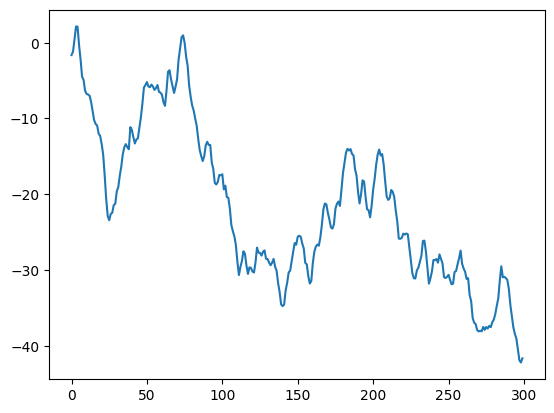

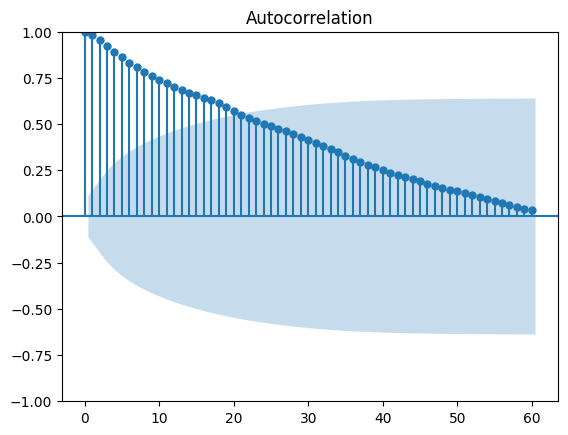

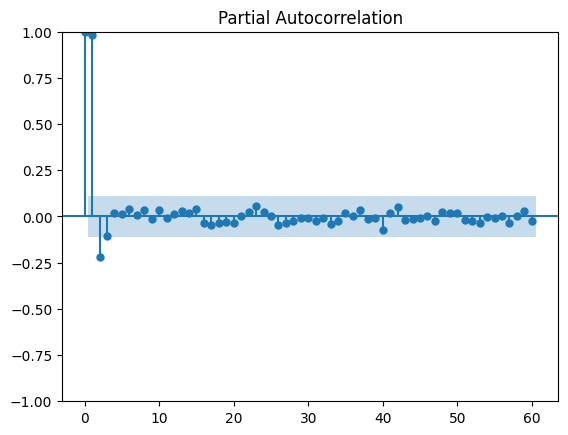

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import shapiro
import seaborn as sns
import scipy.stats as st

data = pd.read_csv('Homework_1_DATA.csv', sep=';', decimal=',')
series = data.iloc[:300,2]

y = series

N = 60
num_lags = N # Es el número de saltos hacia atrás, depende de la granularidad

plt.plot(y)
plt.show()
plot_acf(y, lags=num_lags)
plt.show()
plot_pacf(y,lags=num_lags)
plt.show()

De los resultados obtenidos en la parte superior, podemos analizar que la media parece no ser constante y que existe autocorrelación por lo tanto nuestra intuición nos dice que es una serie no estacionaria.

In [9]:
from scipy.stats import kurtosis, skew

# Basic statistics
mean = np.mean(y)
std = np.std(y)
kurtosis = kurtosis(y)
skewness = skew(y)

print('Mean', mean, 'Standard deviation', std, 'skewness', skewness, 'kurtosis', kurtosis)

Mean -21.65212 Standard deviation 10.411654302379938 skewness 0.35135459794040536 kurtosis -0.7881725902947867


In [10]:
#from pmdarima.arima.utils import ndiffs, nsdiffs
import statsmodels as sm

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)


adf_test = sm.tsa.stattools.adfuller(y,maxlag=10) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the original series")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])
# print(sm.__version__)

ADF test for the original series
Statistic Value: -1.9563398110443255
p-value: 0.3060383584930264


Del ADF test superior, podemos extraer que al ser p_value > 0.05, nos quedamos con H0, es decir, aseguramos que el proceso no es estacionario.

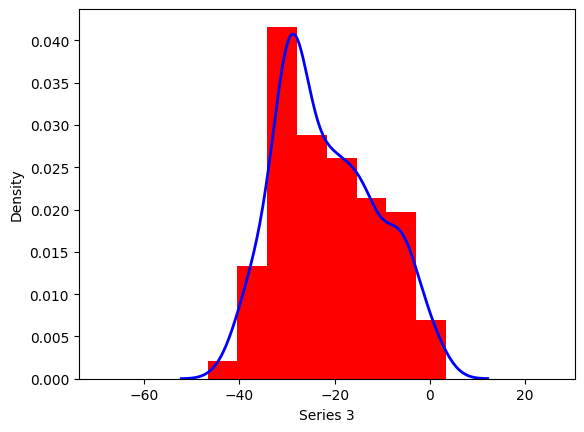

Saphiro ShapiroResult(statistic=np.float64(0.9644950670877008), pvalue=np.float64(1.0186218011815158e-06))
mean -21.65212 std 10.411654302379938


In [11]:
saphiro = shapiro(y)
mean = np.mean(y)
std = np.std(y)
mu = np.mean(y)
sigma = np.std(y)

ax = plt.hist(y,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(y, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 5*std, mean + 5*std)

plt.show()
print("Saphiro",saphiro)
print("mean",mean,"std",std)

Gracias a la gráfica podemos ver claramente que no sigue una distribución normal. Además, el p-valor < 0.05, nos asegura que debemos rechazar la hipótesis nula H0 y quedarnos con H1 (Distribución NO normal)

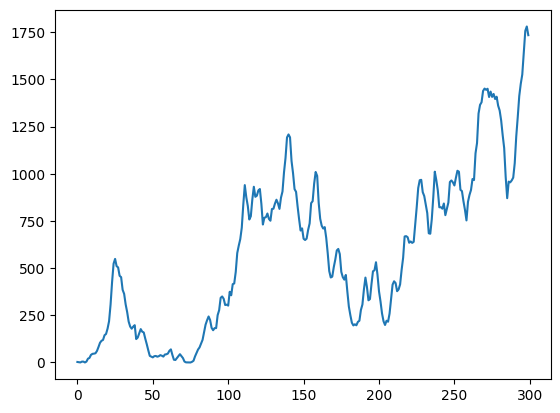

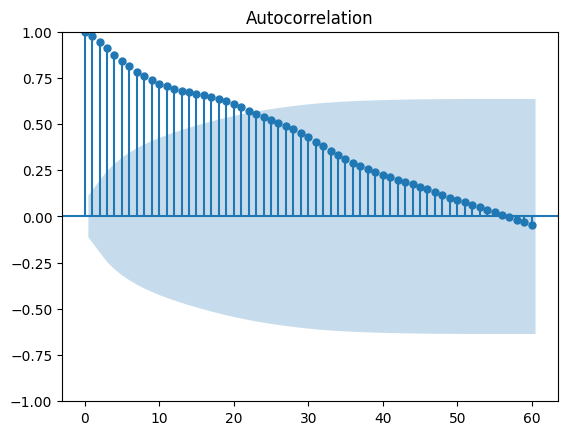

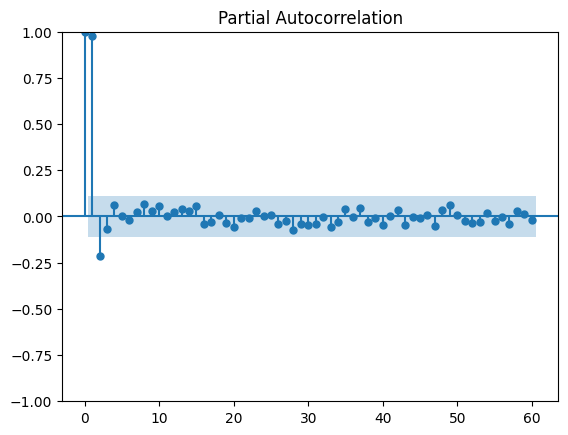

In [12]:
plt.plot((y**2))
plt.show()
plot_acf((y**2), lags=num_lags)
plt.show()
plot_pacf((y**2),lags=num_lags)
plt.show()

De los resultados superiores, podemos extraer que además de existir autocorrelación en Yt, existe autocorrelación en Yt^2 y por lo tanto tenemos un modelo no lineal.

### AHORA TRANSFORMAMOS LA SERIE:

Aplicamos la tranformación de las diferencias al tener media no constante

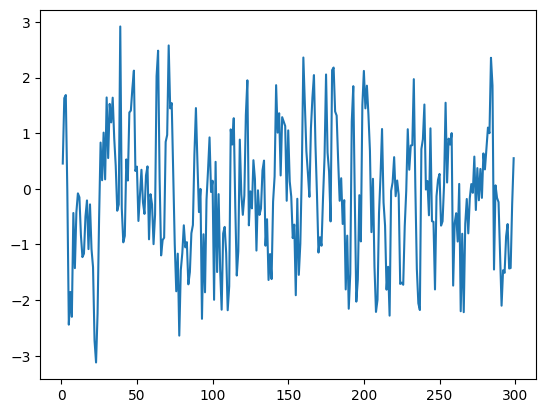

In [13]:
z = y.diff().dropna()

plt.plot(z)

En la gráfica superior podemos ver como tanto la media como la dispersión parece ser constante, por lo que intuimos que es una serie estacionaria. Aunque no se ve tan claro del todo

In [14]:
# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)

adf_test = sm.tsa.stattools.adfuller(z,maxlag=10) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the transformed series")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])
# print(sm.__version__)

ADF test for the transformed series
Statistic Value: -7.203534970150401
p-value: 2.33186130999792e-10


Gracias al ADF test, al tener un p-valor = 0 < 0.05, rechazamos H0 y nos quedamos con H1, es decir aseguramos que la serie transformada es estacionaria.

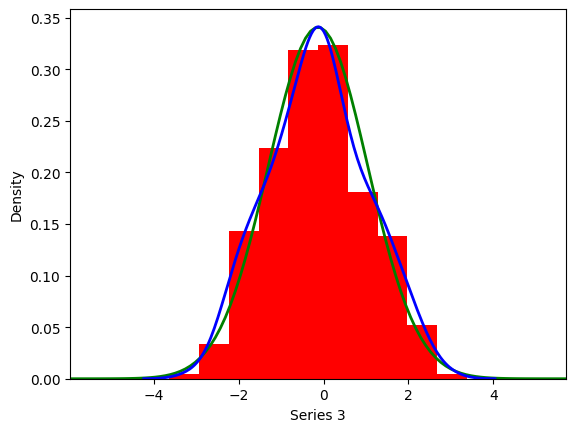

In [15]:
mean = np.mean(z)
std = np.std(z)
mu = np.mean(z)
sigma = np.std(z)
x = np.linspace(mu -5*sigma, mu +5*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(z,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(z, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 5*std, mean + 5*std)

plt.show()

En la gráfica superior podemos ver como no podemos asegurar si sigue una distribución normal.

In [16]:
# Normality test
saphiro = shapiro(z)

print("Saphiro",saphiro) # first output "The test statistic", second output "p-value"

import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(z, lags=[50])
print("Ljung-Box for z") 
print(box_test)

Saphiro ShapiroResult(statistic=np.float64(0.9934376504635258), pvalue=np.float64(0.21782808917148666))
Ljung-Box for z
       lb_stat     lb_pvalue
50  198.784895  1.248648e-19


Gracias al Saphiro test superior podemos ver como el p-valor está por debajo de 0.05, rechazamos H0 y nos quedamos con H1 es decir, No sigue una distribución normal.

In [17]:
from scipy.stats import kurtosis, skew

# Basic statistics
mean = np.mean(z)
std = np.std(z)
kurtosis = kurtosis(z)
skewness = skew(z)

print("Mean",mean,"Standard deviation",std,"Skewness", skewness, "Kurtosis",kurtosis)


Mean -0.1338494983277592 Standard deviation 1.1704060756983112 Skewness 0.06868482197285038 Kurtosis -0.4598331395768045


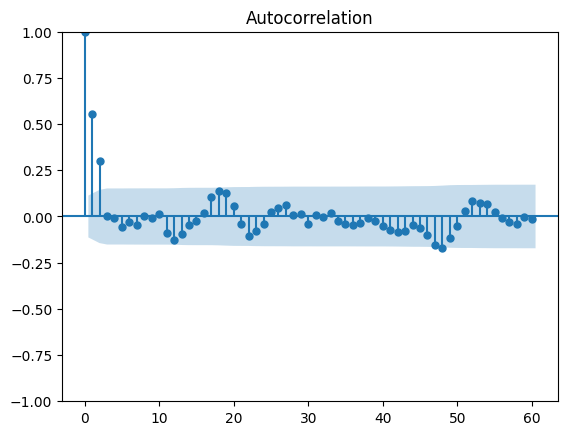

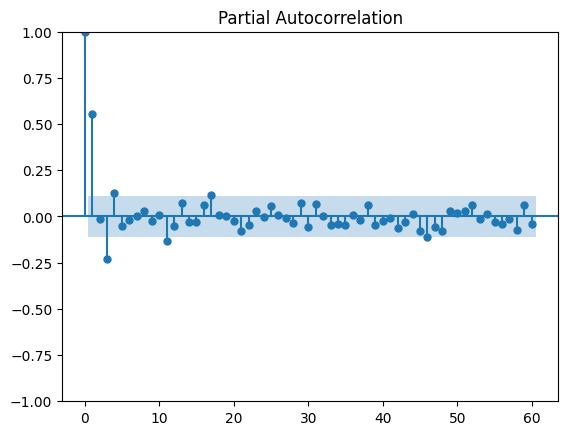

In [18]:
plot_acf(z,lags=num_lags)
plt.show()
plot_pacf(z,lags=num_lags)
plt.show()

En función a los resultados superiores, hemos comprobado ya que es estacionaria y que la media parece ser prácticamente 0. No obstante, hay autocorrelación por lo que decimos que no es ruido blanco.

In [20]:
import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(z, lags=[20])
print("Ljung-Box for z") 
print(box_test)

Ljung-Box for z
     lb_stat     lb_pvalue
20  148.7107  1.109369e-21


Debido a los resultados obtenidos en el Ljung-Box superior, vemos que el p-valor < 0.05, rechazando H0 y nos quedamos con H1 es decir hay autocorrelación por lo tanto comprobamos que NO tenemos ruido blanco.

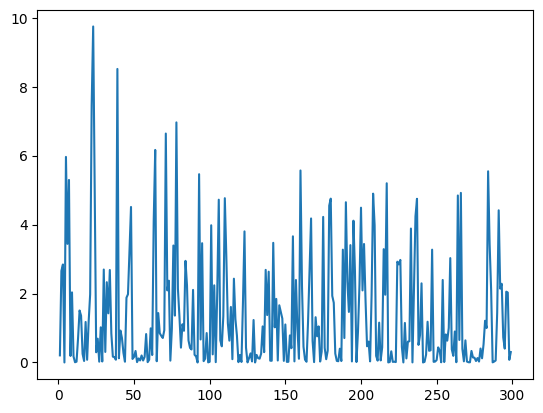

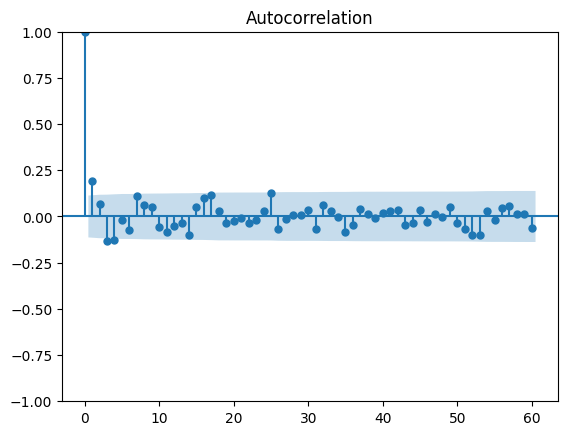

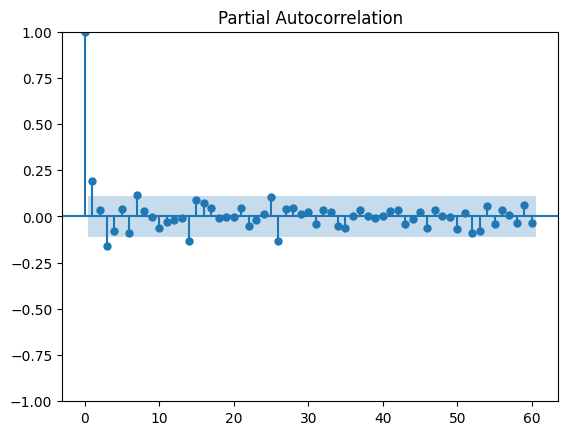

In [21]:
plt.plot(z**2)
plt.show()
plot_acf(z**2,lags=num_lags)
plt.show()
plot_pacf(z**2,lags=num_lags)
plt.show()

In [22]:
import statsmodels.api as sm
box_test2 = sm.stats.acorr_ljungbox(z**2, lags=[20])
print("Ljung-Box for z**2") 
print(box_test2)

Ljung-Box for z**2
      lb_stat  lb_pvalue
20  47.581556   0.000487


Finalmente, gracias a los resultados superiores podemos ver que hay autocorrelacion en Zt^^2 por lo tanto podemos saber que sigue un modelo no lineal.